<a href="https://colab.research.google.com/github/zszazi/MSD/blob/master/MSD_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MSD intern

## upload images 

I had some problem with navigating through image in google colab 
so I locally downloaded few images and tried template matching on it

In [18]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving crop11.jpg to crop11.jpg
Saving image11.jpg to image11 (1).jpg
User uploaded file "crop11.jpg" with length 9974 bytes
User uploaded file "image11.jpg" with length 74579 bytes


## Import required libraries

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Change the name of uploaded image and crop file

In [0]:


img = cv2.imread('image11.jpg',0)
img2 = img.copy()
template = cv2.imread('crop11.jpg',0)
w, h = template.shape[::-1]



In [0]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
img_rgb = cv.imread('image11.jpg')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('crop11.jpg',0)
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 3)
cv2_imshow(res)
 

# There are total 6 inbuilt methods for template matching



**1.   TM_CCOEFF**

**2.   TM_CCOEFF_NORMED**

**3.   TM_CCORR**

**4.   TM_CCORR_NORMED**

**5.   TM_SQDIFF**

**6.   TM_SQDIFF_NORMED**



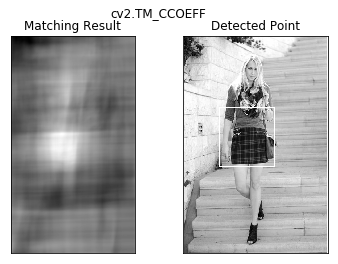

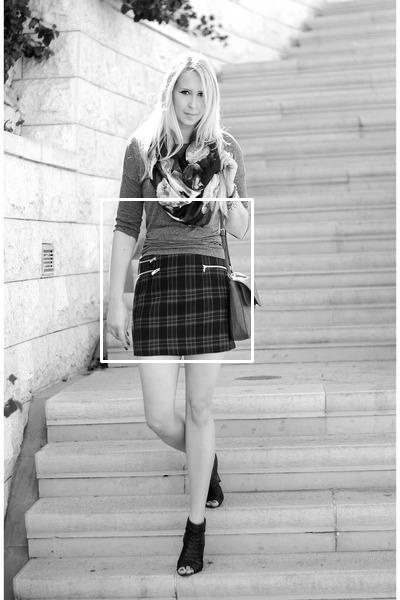

-24615556.0 28876666.0 (11, 1) (101, 199)


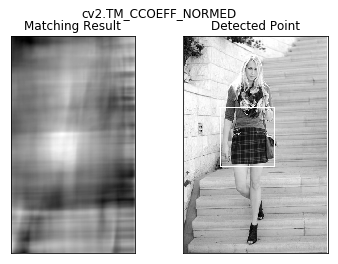

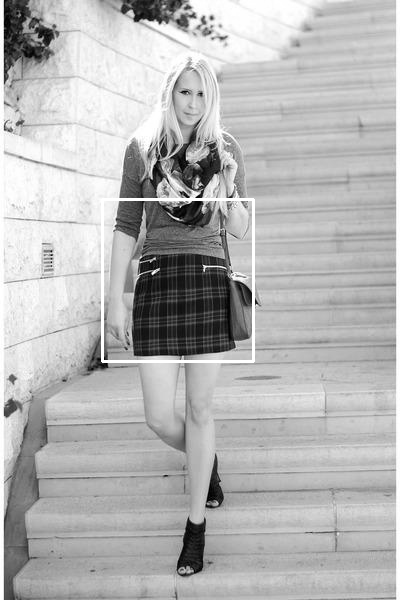

-0.4136885702610016 0.3770569860935211 (37, 12) (102, 199)


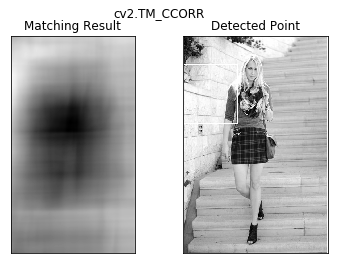

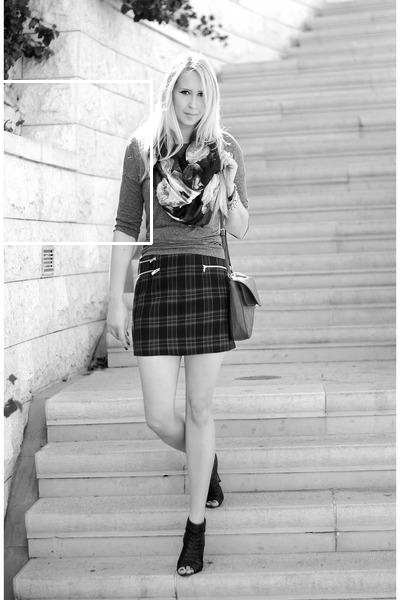

158274400.0 303128192.0 (116, 190) (0, 81)


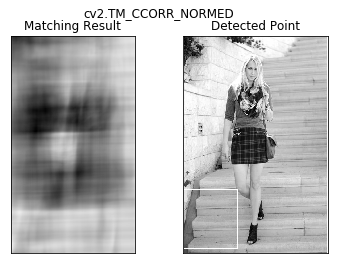

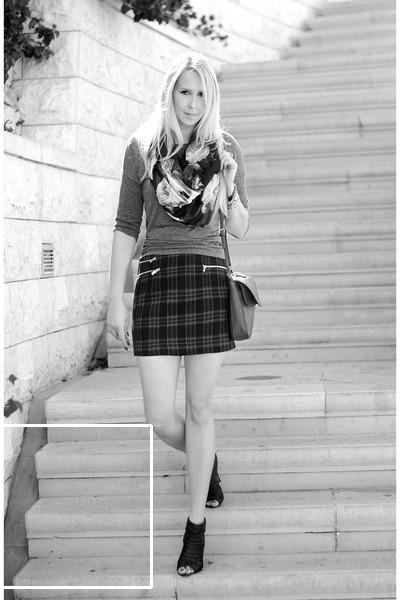

0.6673038005828857 0.8097569942474365 (50, 193) (0, 425)


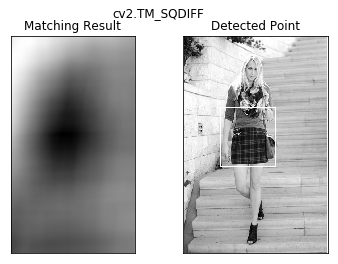

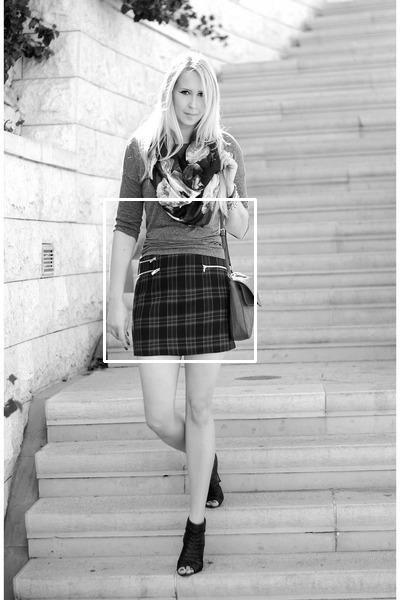

168978704.0 763961984.0 (104, 199) (0, 54)


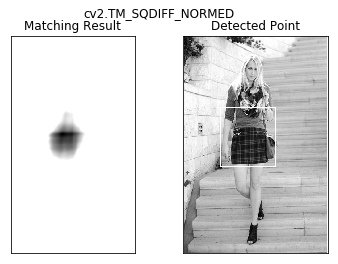

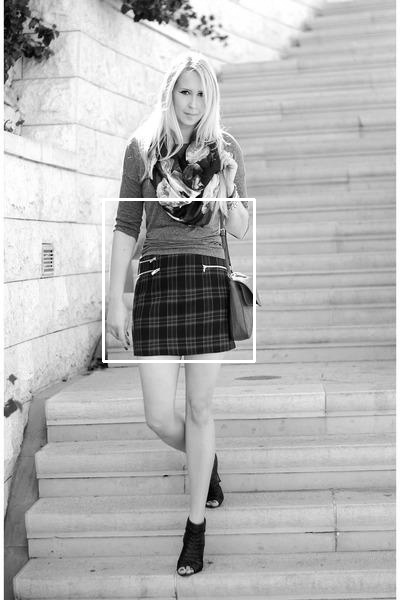

0.7565264701843262 1.0 (103, 199) (0, 0)


In [65]:

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()
    
    cv2_imshow(img)
    
    # PRINT The Coordinates
    print(min_val,max_val,min_loc,max_loc)
    